<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [6]:
os.chdir("/content/drive/MyDrive/R8 GL ")

In [68]:
product_df=pd.read_csv('product_data.csv')
reviews_df=pd.read_csv('reviews.csv')

In [10]:
product_df.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
601,B07RJ16QXJ,Motorola,Motorola One - 64GB - Black/White - Unlocked (...,https://www.amazon.com/Motorola-One-Black-Whit...,https://m.media-amazon.com/images/I/61kX6tnhSU...,2.9000000,https://www.amazon.com/product-reviews/B07RJ16QXJ,4,179.9900000,0.0000000
513,B07N4M412B,Samsung,Samsung Galaxy S10 Factory Unlocked Phone with...,https://www.amazon.com/Samsung-Galaxy-Factory-...,https://m.media-amazon.com/images/I/51x8eZ8JbK...,4.2000000,https://www.amazon.com/product-reviews/B07N4M412B,346,649.9900000,899.9900000
341,B078RBVVCV,Motorola,Motorola Moto G5S Plus XT1805 4G LTE Unlocked ...,https://www.amazon.com/Motorola-XT1805-Factory...,https://m.media-amazon.com/images/I/71uHmL4wC3...,3.5000000,https://www.amazon.com/product-reviews/B078RBVVCV,56,175.0000000,0.0000000
409,B07F3YGL26,Xiaomi,Xiaomi Redmi S2 (32GB 3GB RAM) with AI Smart S...,https://www.amazon.com/Cameras-Display-Unlocke...,https://m.media-amazon.com/images/I/41NTLwPYT6...,5.0000000,https://www.amazon.com/product-reviews/B07F3YGL26,1,139.9900000,155.0000000
264,B0731KVYPN,Google,"Google Pixel GSM Unlocked (Renewed) (128GB, Si...",https://www.amazon.com/Google-Pixel-Unlocked-R...,https://m.media-amazon.com/images/I/41e972fjKn...,3.2000000,https://www.amazon.com/product-reviews/B0731KVYPN,41,139.9500000,0.0000000


In [11]:
reviews_df.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
5027,B00CEKXJ3Y,c.kevin frazier,4,"December 29, 2013",True,stepping into the 21st century,"Lightning fast compared to my old phone, a sam...",nan
35333,B071H9KKKF,Kindle Customer,3,"November 28, 2018",True,Great phone fast charger a disappointment,The fast charger is not compatible with the Ca...,nan
26970,B01M0PADR4,Amazon Customer,3,"March 20, 2017",False,Scratches Easily,I was with Sprint for years before switching t...,1.0000000
9327,B00FTV382C,MSempre,2,"May 9, 2016",True,S-finder hardware problem & etc.,"This product was very, very problematic. The r...",5.0000000
27141,B01M0PADR4,Frank S.,1,"October 21, 2016",False,I have seen this one in Verizon Store. Compare...,I have seen this one in Verizon Store. Compare...,7.0000000


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [8]:
product_df.columns


Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [9]:
reviews_df.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')

In [69]:
col=['url','image','reviewUrl']
product_df.drop(col,inplace=True,axis=1)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [13]:
product_df.describe(include='all')

,asin,brand,title,rating,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,nan,nan,nan
top,B074P62MW8,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",nan,nan,nan,nan
freq,1,346,2,nan,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,122.2500000,336.7250000,0.0000000


In [14]:
reviews_df.describe(include='all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,43932,43931,43932.0000000,43932,43932,43927,43920,17312.0000000
unique,335,31554,nan,2982,2,26444,39148,nan
top,B00F2SKPIM,Amazon Customer,nan,"July 20, 2017",True,Five Stars,Good,nan
freq,981,4670,nan,62,39035,5824,163,nan
mean,NaN,NaN,3.6777747,NaN,NaN,NaN,NaN,7.3003119
std,NaN,NaN,1.6300301,NaN,NaN,NaN,NaN,28.7130017
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,2.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,4.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

In [15]:
#720 items are listed.
#10 items are unique
#4 missing brand values 
#Mean Rating is 3.71

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

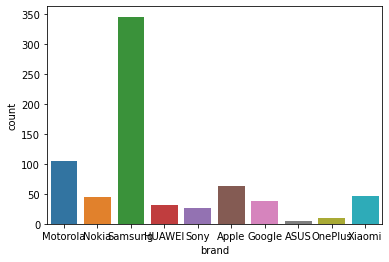

In [18]:

# importing the required library
 
import seaborn as sns
import matplotlib.pyplot as plt
 
# count plot on single categorical variable
sns.countplot(x ='brand', data = product_df)
 
# Show the plot
plt.show()

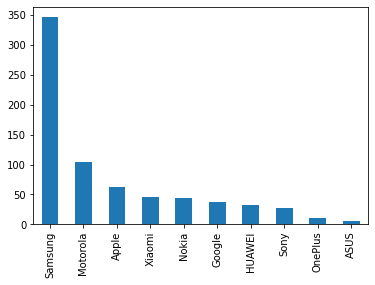

In [21]:
product_df['brand'].value_counts().plot(kind='bar')

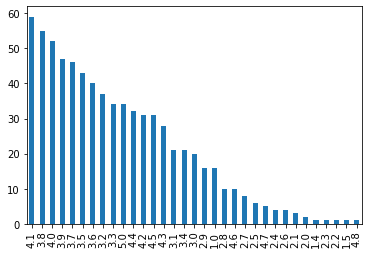

In [24]:
product_df['rating'].value_counts().plot(kind='bar')

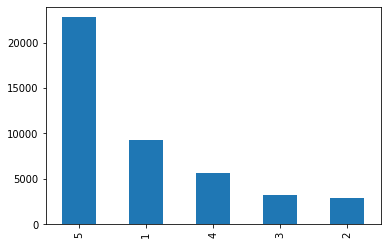

In [25]:
reviews_df['rating'].value_counts().plot(kind='bar')

### 4.5 Display average rating per brand

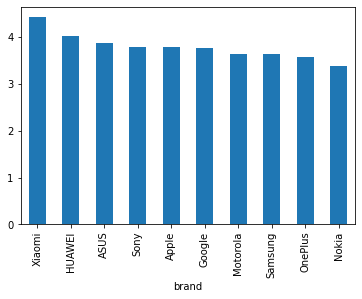

In [30]:
product_df.groupby('brand').mean()['rating'].sort_values(ascending=False).plot(kind='bar')

### 4.6 Display average price per brand

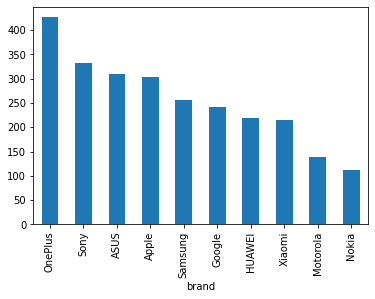

In [31]:
product_df.groupby('brand').mean()['price'].sort_values(ascending=False).plot(kind='bar')

### 4.7 Display average 'totalReviews' per brand

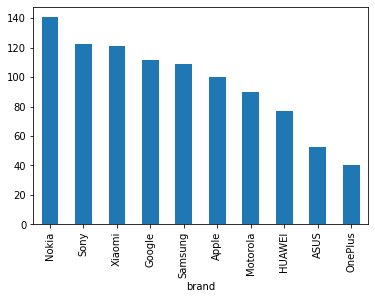

In [32]:
product_df.groupby('brand').mean()['totalReviews'].sort_values(ascending=False).plot(kind='bar')

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [70]:
df = pd.merge( reviews_df, product_df,how='left',on='asin')
df

In [51]:
reviews_df.shape

(67986, 8)

In [52]:
product_df.shape

(720, 10)

In [71]:
df.shape

(67986, 14)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [80]:
df.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"},inplace=True)


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [82]:
df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [83]:
df1=df[df['verified']==True]
df1

In [76]:
df1.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

In [77]:
df1['brand'].value_counts()

Samsung     31020
Motorola     7714
Nokia        4878
Apple        4876
Xiaomi       4207
Google       3163
Sony         2691
HUAWEI       2019
OnePlus       304
ASUS          206
Name: brand, dtype: int64

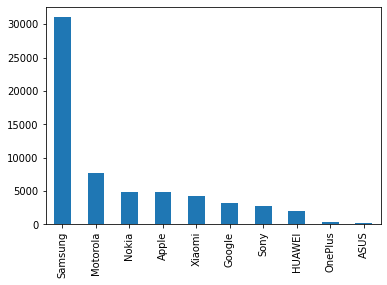

In [64]:
df1['brand'].value_counts().plot(kind = 'bar')

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [84]:
rev_col = ['brand','body','price','user_rating','review_title']
df_review = df1[rev_col]
df_review.head()

,brand,body,price,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but"
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

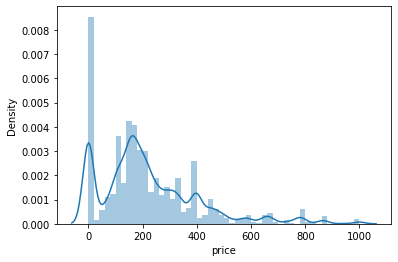

In [85]:
sns.distplot(df_review['price'])

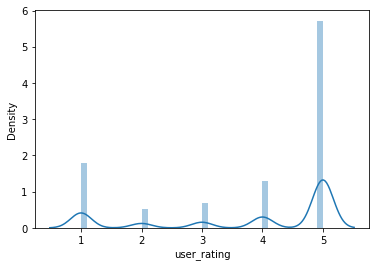

In [86]:
sns.distplot(df_review['user_rating'])

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [87]:
df_review['sentiment'] = df_review['user_rating'].apply(lambda x : 1 if x > 3 else (0 if x ==3 else -1))

In [88]:
df_review.sample(5)

,brand,body,price,user_rating,review_title,sentiment
21616,Samsung,The charging port no longer works and all of a...,248.7000000,2,I'm beyond annoyed at the $350 I wasted on a p...,-1
41288,Samsung,Love it! Just like new!,330.9500000,5,Love it!,1
28099,Samsung,Product was exactly as advertised. Very pleased.,134.9900000,5,Very pleased.,1
22417,Samsung,i just love my new Samsung Galaxy S7 Edge. It ...,399.0000000,5,i just love my new Samsung Galaxy S7 Edge,1
14427,Motorola,I like the phone a lot . It seems to have a fe...,149.9900000,4,Awsome phone slightly buggy hopfully not refur...,1


### 4.15 Check frequency distribution of the 'sentiment'

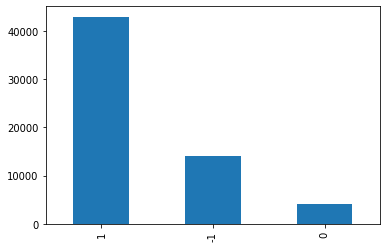

In [89]:
df_review['sentiment'].value_counts().plot(kind='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

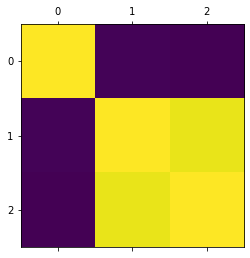

In [90]:
plt.matshow(df_review.corr())
plt.show()

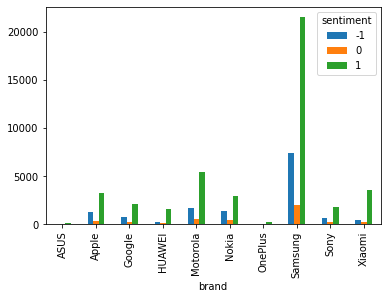

In [91]:
pd.crosstab(df_review['brand'] , df_review['sentiment']).plot(kind = 'bar')

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [92]:
df_review['body'] = df_review['body'].astype('str')

In [93]:
df_review['body'] = df_review['body'].apply(lambda x: x.lower())
df_review['body'].head()

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good. i had used thi...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my at&t phone repla...
Name: body, dtype: object

### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [94]:
df_review['body'] = df_review['body'].str.replace('[^\w\s]','')
df_review['body'].head()

14                              dont buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good i had used this...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my att phone replac...
Name: body, dtype: object

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [95]:
import nltk

nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{"mightn't", 'off', 'ours', "hadn't", 'his', 'no', 'is', 'why', 'themselves', 'don', "should've", 'these', 'hers', 'were', 'ma', 'are', 'her', 'd', 'have', 'between', 'while', 'under', "you'll", 'both', 'had', 'a', 'what', 'how', "you'd", "wouldn't", 'by', 'same', 'does', 'do', 'ain', "mustn't", 'so', 'yourselves', 'if', 'nor', 'those', "that'll", 'over', 'did', 'more', "didn't", 'before', 'just', "weren't", 'ourselves', 'your', 'until', 'few', 'doesn', 'yours', 'haven', 'am', 'y', 'was', 'its', 'should', 'aren', 'doing', 'and', "aren't", 'then', 'now', 'up', 'himself', 'them', 'with', 'they', 'wasn', "she's", 're', 'won', 'couldn', 'any', 'been', 'but', "shouldn't", 'this', 'when', 'm', 'has', 'which', 'hadn', 'once', 'who', 'our', 'being', 'be', 'at', 'further', 'can', 'each', 'mightn', 'not', 'herself', 'an', 'weren', 'against', 'below', 'too', 'here', 'above', 'o', 'my', '

In [96]:
df_review['keyword'] = df_review['body'].apply(lambda x : " ".join(word for word in x.split() if word not in stop_words))

In [97]:
df_review.head()

,brand,body,price,user_rating,review_title,sentiment,keyword
14,Motorola,dont buy out of service,49.9500000,1,Stupid phone,-1,dont buy service
17,Motorola,1 star because the phones locked so i have to ...,49.9500000,1,Phones locked,-1,1 star phones locked pay additional fees unlock
18,Motorola,the product has been very good i had used this...,49.9500000,5,Excellent product,1,product good used cell phone one projects work...
21,Motorola,i bought this phone to replace an lg phone tha...,99.9900000,4,"Nice, but",1,bought phone replace lg phone didnt like expec...
22,Motorola,i purchased this phone for my att phone replac...,99.9900000,1,It seems it doesn't work with the existing AT&...,-1,purchased phone att phone replacement even tho...


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [104]:
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#stemming = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  #return " ".join( lemmatizer.stem(w) for w in text.split())
  return " ".join( lemmatizer.lemmatize(w) for w in text.split())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [105]:
df_review['lemm'] = df_review['keyword'].apply(lambda x: lemmatize_text(x))

In [106]:
df_review.sample(5)

,brand,body,price,user_rating,review_title,sentiment,keyword,lemm
44362,Samsung,i bought it as used phone after 1 month the ba...,0.0000000,1,Poor battery life,-1,bought used phone 1 month battery started dyin...,bought used phone 1 month battery started dyin...
44194,Google,after months of use the pixel continues to imp...,155.9900000,5,A convert - great phone,1,months use pixel continues impress android pie...,month use pixel continues impress android pie ...
61576,Xiaomi,buen teléfono toma excelentes fotos,264.9900000,5,"Lo mejor, el número 1 de las gamas intermesias",1,buen teléfono toma excelentes fotos,buen teléfono toma excelentes fotos
51253,Xiaomi,overall very satisfied with this phone except ...,314.5000000,4,Delay in screen when playing games or using mo...,1,overall satisfied phone except one thing scree...,overall satisfied phone except one thing scree...
20063,Motorola,exactly why its says it is in perfect condition,0.0000000,5,Five Stars,1,exactly says perfect condition,exactly say perfect condition


### 5.5 Write a function to check word frequency of the text

In [107]:
def word_freq_count(text):
  words = text.split()
  freqdict = {word: words.count(word) for word in words}
  return freqdict


In [108]:
word_freq = df_review[df_review['sentiment'] == 1]['lemm'].apply(lambda x: word_freq_count(x))

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [109]:
word_freq = df_review[df_review['sentiment'] == 1]['lemm'].apply(lambda x: word_freq_count(x))

In [110]:
word_freq

18       {'product': 1, 'good': 1, 'used': 1, 'cell': 1...
21       {'bought': 1, 'phone': 4, 'replace': 1, 'lg': ...
24         {'served': 1, 'well': 1, 'back': 1, 'phone': 1}
26       {'sturdy': 1, 'clarity': 1, 'great': 1, 'easy'...
28       {'beautiful': 1, 'job': 1, 'used': 1, 'item': ...
43       {'phone': 6, 'isnt': 1, 'kidding': 1, 'say': 1...
45        {'wont': 1, 'enter': 1, 'special': 1, 'code': 1}
46       {'mother': 4, 'said': 1, 'love': 2, 'walkie': ...
48       {'price': 1, 'really': 1, 'get': 1, 'solid': 1...
49       {'phone': 3, 'come': 1, 'sim': 2, 'cardinforma...
51       {'good': 1, 'phone': 1, 'work': 2, 'well': 1, ...
52       {'get': 1, 'basic': 1, 'function': 1, 'cell': ...
64       {'replacement': 1, 'one': 1, 'mom': 1, 'went':...
65       {'shipping': 1, 'time': 1, 'phone': 5, 'great'...
67                         {'delivered': 1, 'promised': 1}
69       {'wife': 1, 'love': 1, 'phone': 1, 'third': 1,...
70       {'phone': 2, 'one': 1, 'husband': 1, 'got': 1,.

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidvectorizer = TfidfVectorizer()
review_vectorizer = tfidvectorizer.fit_transform(df_review['lemm'])

In [112]:
review_vectorizer

<61225x36034 sparse matrix of type '<class 'numpy.float64'>'
	with 1171996 stored elements in Compressed Sparse Row format>

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [113]:
X = review_vectorizer
Y = df_review['sentiment']

### 5.9 Split the data into Train & Test Sets

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=49)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [116]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

print("Training Accuracy" , rfc.score(X_train, y_train))
print("Testing Accuracy" , rfc.score(X_test, y_test))

Training Accuracy 0.995146650488835
Testing Accuracy 0.8506641986062717


In [117]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = rfc.predict(X_test)

confusion_matrix(y_pred , y_test)

array([[ 3085,   367,   372],
       [   12,    80,    13],
       [ 1209,   770, 12460]])

In [118]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.72      0.81      0.76      3824
           0       0.07      0.76      0.12       105
           1       0.97      0.86      0.91     14439

    accuracy                           0.85     18368
   macro avg       0.58      0.81      0.60     18368
weighted avg       0.91      0.85      0.88     18368



## 7. Write your conclusion

In [ ]:
#we should focus on -ve reviews more and try to fix the issues with the product als 
#we need to focus on those customers those who are not happy as they should be tiltted towards positive review.